In [17]:
%%capture
# Export this Notebook to PDF
!jupyter nbconvert --to pdf "Analysis.ipynb" \
    --TagRemovePreprocessor.enabled=True  \
    --TagRemovePreprocessor.remove_cell_tags remove_cell \
    --TagRemovePreprocessor.remove_all_outputs_tags remove_output \
    --TagRemovePreprocessor.remove_input_tags remove_input;

# Descriptive Statistics & Visualization

## Descriptive Statistics

### Setup

In [1]:
# Make Jupyter reload library before every execution

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

df= pd.read_csv('data/all.csv', parse_dates=True, )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Timestamp                        108 non-null    object 
 1   Age Group                        108 non-null    object 
 2   Gender                           108 non-null    object 
 3   Education Level                  108 non-null    object 
 4   Occupation                       108 non-null    object 
 5   Exercise Days/Week               108 non-null    object 
 6   Device Usage (hrs/day)           108 non-null    object 
 7   Screen Time Before Sleep         108 non-null    object 
 8   Height (cm)                      83 non-null     float64
 9   Weight (kg)                      92 non-null     float64
 10  Bedtime                          108 non-null    object 
 11  Wake-up Time                     108 non-null    object 
 12  Sleep Onset Time      

Some random samples from the dataset:

In [3]:
df.drop(labels=["Timestamp"], inplace=True, axis=1)
df.sample(5)

,Age Group,Gender,Education Level,Occupation,Exercise Days/Week,Device Usage (hrs/day),Screen Time Before Sleep,Height (cm),Weight (kg),Bedtime,Wake-up Time,Sleep Onset Time,Nap Duration,Sleep Duration (hrs/24hr),Sleep Quality,Sleep Disturbances,Sleep Medication,Language,BMI,Calculated Night Sleep Duration
50,16-24,Male,High School,Student,3-4 Days,1-3 Hours,30-60 Minutes,174.00,79.0,01:00,07:00,<15 Minutes,30-60 Minutes,4-6 Hours,2,Rarely,No,English,26.1,6.0
75,25-34,Male,Master's,Other,3-4 Days,4-6 Hours,<30 Minutes,NaN,NaN,23:00,07:00,<15 Minutes,<30 Minutes,6+ Hours,4,Sometimes,No,Bengali,NaN,8.0
59,25-34,Male,Doctorate,Professional/Office Worker,5+ Days,4-6 Hours,1-2 Hours,180.00,85.0,23:00,06:30,<15 Minutes,No Nap,6+ Hours,4,Rarely,No,English,26.2,7.5
92,25-34,Female,Master's,Professional/Office Worker,3-4 Days,4-6 Hours,1-2 Hours,NaN,NaN,23:00,06:00,<15 Minutes,No Nap,6+ Hours,4,Rarely,No,Vietnamese,NaN,7.0
35,25-34,Female,Bachelor's,Professional/Office Worker,1-2 Days,7+ Hours,30-60 Minutes,172.72,70.0,23:00,06:00,15-30 Minutes,No Nap,4-6 Hours,4,Rarely,No,English,23.5,7.0


### Overall descriptive stats

In [4]:
# Calculating descriptive statistics for the dataset
descriptive_stats = df.describe()

# Since describe() includes only numeric data by default, adding additional descriptive statistics for non-numeric data
non_numeric_stats = df.describe(include=[object])


In [5]:
descriptive_stats

,Height (cm),Weight (kg),Sleep Quality,BMI,Calculated Night Sleep Duration
count,83.000000,92.000000,108.000000,80.000000,105.000000
mean,165.305542,67.415217,3.444444,24.552500,7.036952
std,8.321679,12.798085,0.824092,4.245503,1.368431
min,150.000000,43.000000,2.000000,17.500000,1.670000
25%,160.000000,59.800000,3.000000,21.500000,6.500000
50%,167.000000,68.000000,3.000000,23.550000,7.000000
75%,171.000000,75.000000,4.000000,26.600000,8.000000
max,185.000000,100.000000,5.000000,39.400000,9.750000


- **Sleep Quality:** On average, respondents rated their sleep quality around 3 on a scale, indicating moderate sleep quality.
- **BMI:** The average Body Mass Index (BMI) is around 23.55, with a range extending from 16.5 to 39.4.
- **Calculated Night Sleep Duration:** The average night sleep duration is around 7 hours, with a wide range from 1.67 hours to almost 9.75 hours.

In [6]:
non_numeric_stats

,Age Group,Gender,Education Level,Occupation,Exercise Days/Week,Device Usage (hrs/day),Screen Time Before Sleep,Bedtime,Wake-up Time,Sleep Onset Time,Nap Duration,Sleep Duration (hrs/24hr),Sleep Disturbances,Sleep Medication,Language
count,108,108,108,108,108,108,108,108,108,108,108,107,108,108,108
unique,5,3,4,7,4,4,4,18,20,4,5,3,5,2,4
top,25-34,Male,Master's,Student,1-2 Days,7+ Hours,30-60 Minutes,23:00,07:00,15-30 Minutes,No Nap,6+ Hours,Rarely,No,English
freq,72,67,47,47,43,43,45,24,18,55,61,64,48,105,68


- **Age Group:** The most common age group among respondents is 25-34.
- **Gender:** A slightly higher number of male respondents compared to females.
- **Education Level:** The majority of respondents have a Master's degree.
- **Occupation:** Many respondents are students.
- **Exercise Days/Week:** '1-2 Days' is the most common response for exercise frequency.
- **Device Usage (hrs/day):** A large portion of respondents use devices for '7+ Hours' per day.
- **Screen Time Before Sleep:** '30-60 Minutes' is the most common duration for screen time before sleep.
- **Sleep Disturbances:** 'Rarely' is the most frequent response, indicating that most respondents rarely experience sleep disturbances.
- **Sleep Medication:** The majority of respondents do not use sleep medication.
- **Language:** English is the most common language among respondents.

### Sleep related fields

In [7]:
sleep_related_columns = ['Sleep Duration (hrs/24hr)', 'Sleep Quality', 'Sleep Disturbances', 'Sleep Medication', 'Calculated Night Sleep Duration']
sleep_descriptive_stats = df[sleep_related_columns].describe(include='all')

sleep_descriptive_stats

,Sleep Duration (hrs/24hr),Sleep Quality,Sleep Disturbances,Sleep Medication,Calculated Night Sleep Duration
count,107,108.000000,108,108,105.000000
unique,3,NaN,5,2,NaN
top,6+ Hours,NaN,Rarely,No,NaN
freq,64,NaN,48,105,NaN
mean,NaN,3.444444,NaN,NaN,7.036952
std,NaN,0.824092,NaN,NaN,1.368431
min,NaN,2.000000,NaN,NaN,1.670000
25%,NaN,3.000000,NaN,NaN,6.500000
50%,NaN,3.000000,NaN,NaN,7.000000
75%,NaN,4.000000,NaN,NaN,8.000000



**Sleep Duration:**

The most common reported sleep duration is '6+ Hours'. This suggests that a majority of the respondents are getting the minimum recommended amount of sleep for adults, which is usually around 7-9 hours. However, without more specific data on those who sleep '6+ Hours' (e.g., whether they are closer to 6 or 9 hours), it's hard to assess the adequacy of sleep duration precisely.

**Sleep Quality:**

The average sleep quality score is 3.44 out of 5. This indicates a moderate level of sleep quality among the respondents. A score closer to 5 would suggest better sleep quality, so there's room for improvement.
The presence of some variability (standard deviation of 0.82) suggests differing sleep quality experiences among respondents.

**Sleep Disturbances:**

'Rarely' being the most common response for sleep disturbances is a positive sign, suggesting that most respondents do not frequently experience sleep disturbances.

**Sleep Medication:**

The fact that the vast majority of respondents do not use sleep medication (105 out of 108) could indicate that sleep issues are not severe enough to require medication, or there might be a preference for non-medical approaches to sleep improvement.

**Calculated Night Sleep Duration:**

The calculated average night sleep duration is approximately 7 hours, which aligns with general sleep recommendations. However, the range (minimum of 1.67 hours and a maximum of 9.75 hours) indicates significant variability among respondents.
Overall, these statistics suggest a relatively positive picture in terms of sleep quantity (with most respondents getting 6 or more hours of sleep) and a moderate level of sleep quality. However, the variability in sleep quality and duration indicates that experiences vary significantly among individuals. This variability could be explored further to understand what factors (like lifestyle, diet, or exercise) might be influencing sleep patterns.

## Visualization

### Overview

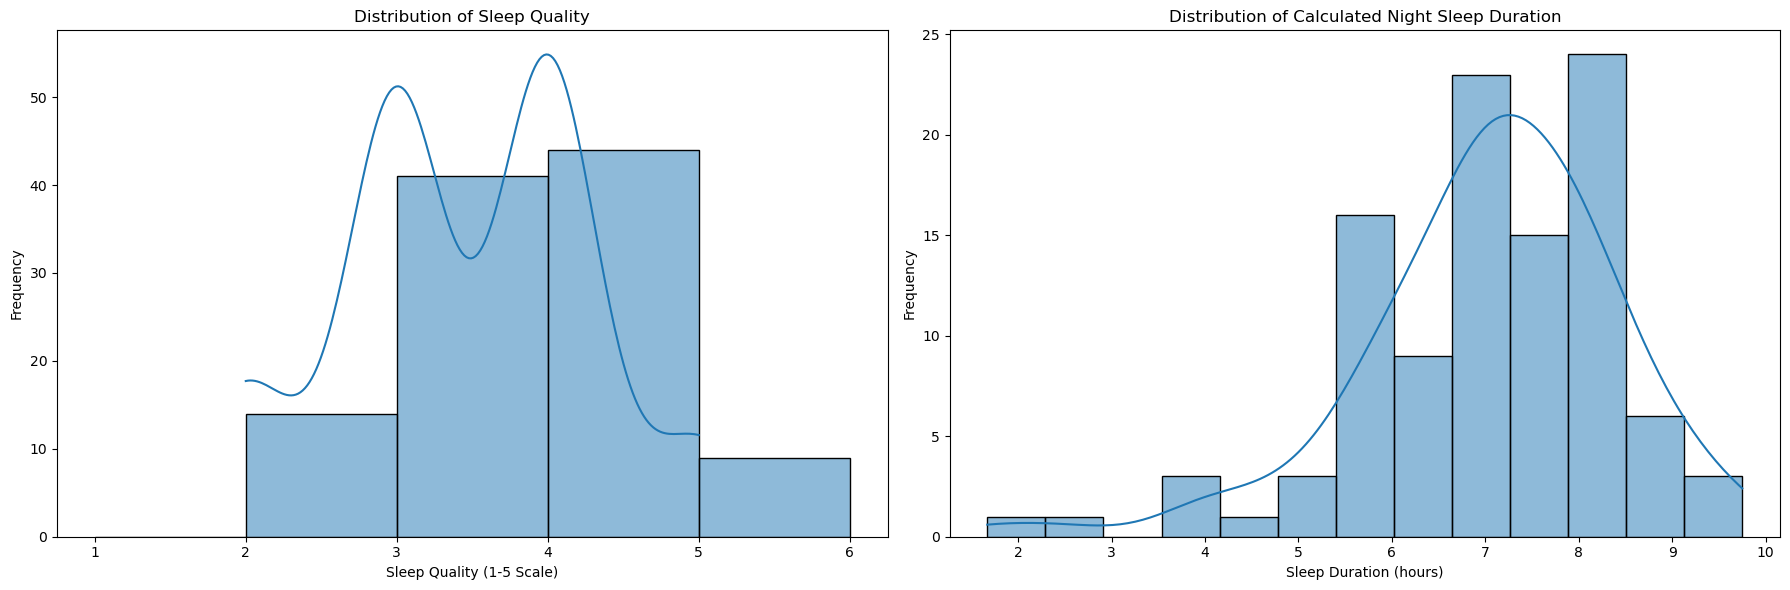

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjusting the code to display the two histograms as subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Histogram for Sleep Quality
sns.histplot(df['Sleep Quality'], kde=True, bins=range(1, 7), ax=axes[0])
axes[0].set_title('Distribution of Sleep Quality')
axes[0].set_xlabel('Sleep Quality (1-5 Scale)')
axes[0].set_ylabel('Frequency')

# Histogram for Calculated Night Sleep Duration
sns.histplot(df['Calculated Night Sleep Duration'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribution of Calculated Night Sleep Duration')
axes[1].set_xlabel('Sleep Duration (hours)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



**Distribution of Sleep Quality:**

The sleep quality scores are distributed mainly between 2 and 4, with the majority of respondents reporting a sleep quality of 3.
There's a smaller number of respondents with sleep quality scores of 5, indicating excellent sleep quality.

**Distribution of Calculated Night Sleep Duration:**

The histogram shows a fairly normal distribution centered around 7 hours, which aligns with general sleep recommendations.
There are fewer instances of very short (<5 hours) or very long (>9 hours) sleep durations.

These distributions provide a baseline understanding of sleep patterns among the respondents. Next, let's proceed with the box plots for sleep quality across different exercise frequencies and device usage categories, followed by a scatter plot for BMI vs. sleep quality and a bar chart for sleep disturbances. Let's start with the box plots. 

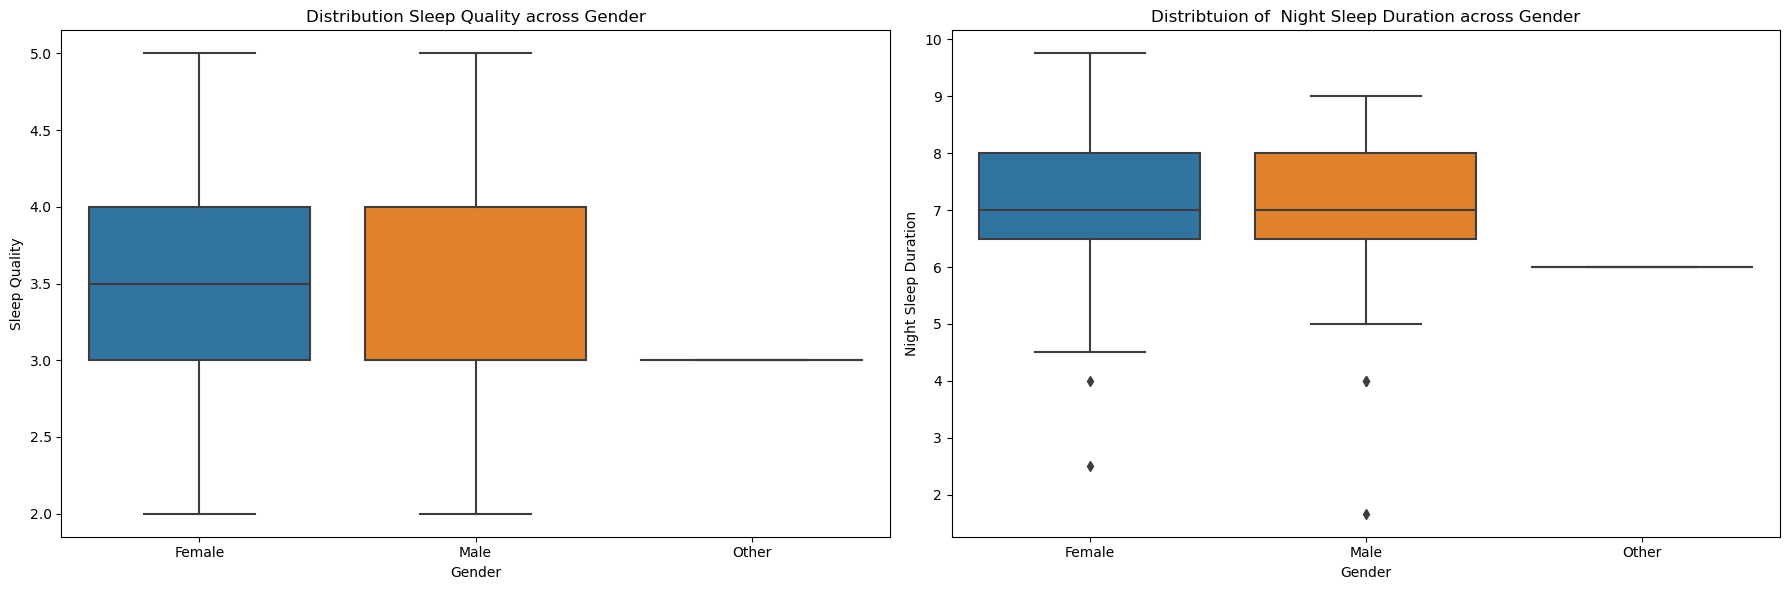

In [9]:
# Adjusting the code to display the two histograms as subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Histogram for Sleep Quality
sns.boxplot(data=df, x='Gender', y='Sleep Quality', ax=axes[0])
axes[0].set_title('Distribution Sleep Quality across Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Sleep Quality')

# Histogram for Calculated Night Sleep Duration
sns.boxplot(data=df, x='Gender', y='Calculated Night Sleep Duration', ax=axes[1])
axes[1].set_title('Distribtuion of  Night Sleep Duration across Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Night Sleep Duration')

plt.tight_layout()
plt.show()

plt.show()

Based on the analysis of the boxplots presented, it is evident that there is a remarkable similarity in sleep quality between male and female participants. Furthermore, the duration of sleep at night for both genders demonstrates a close alignment, with only slight variations observed in the first and second quartiles.

### Correlation matrix

In [10]:
# Define mappings for ordinal conversion
age_mapping = {
    "25-34": 30,
    "16-24": 20,
    "35-44": 40,
    "45-54": 50,
    "55+": 60,
}

onset_mapping = {
    "<15 Minutes": 7.5,
    "30-60 Minutes": 45,
    "15-30 Minutes": 20,
    ">60 Minutes": 60,
}

nap_mapping = {
    "No Nap": 0,
    "<30 Minutes": 15,
    "60-90 Minutes": 75,
    "30-60 Minutes": 45,
    ">90 Minutes": 100,
}
exercise_mapping = {"0 Days": 0, "1-2 Days": 1, "3-4 Days": 2, "5+ Days": 3}
sleep_disturbances_mapping = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Frequently": 3,
    "Often": 4,
}
device_usage_mapping = {
    "<1 Hour": 0,
    "1-3 Hours": 1,
    "3-5 Hours": 2,
    "5-7 Hours": 3,
    "7+ Hours": 4,
}

# Convert 'Exercise Days/Week' and 'Sleep Disturbances' from categorical to ordinal using the defined mappings
df["Age Group Ordinal"] = df["Age Group"].map(age_mapping)
df["Sleep Onset Time Ordinal"] = df["Sleep Onset Time"].map(onset_mapping)
df["Nap Duration Ordinal"] = df["Nap Duration"].map(nap_mapping)
df["Exercise Days/Week Ordinal"] = df["Exercise Days/Week"].map(exercise_mapping)
df["Sleep Disturbances Ordinal"] = df["Sleep Disturbances"].map(
    sleep_disturbances_mapping
)
df["Device Usage (hrs/day) Ordinal"] = df["Device Usage (hrs/day)"].map(
    device_usage_mapping
)

# Select only numerical columns for covariance calculation
numerical_df = df.select_dtypes(include=["number"]).drop(
    ["Height (cm)", "Weight (kg)"], axis=1
)

# Calculate the covariance matrix
corr_matrix = numerical_df.corr()

# Display the correlation matrix
# corr_matrix

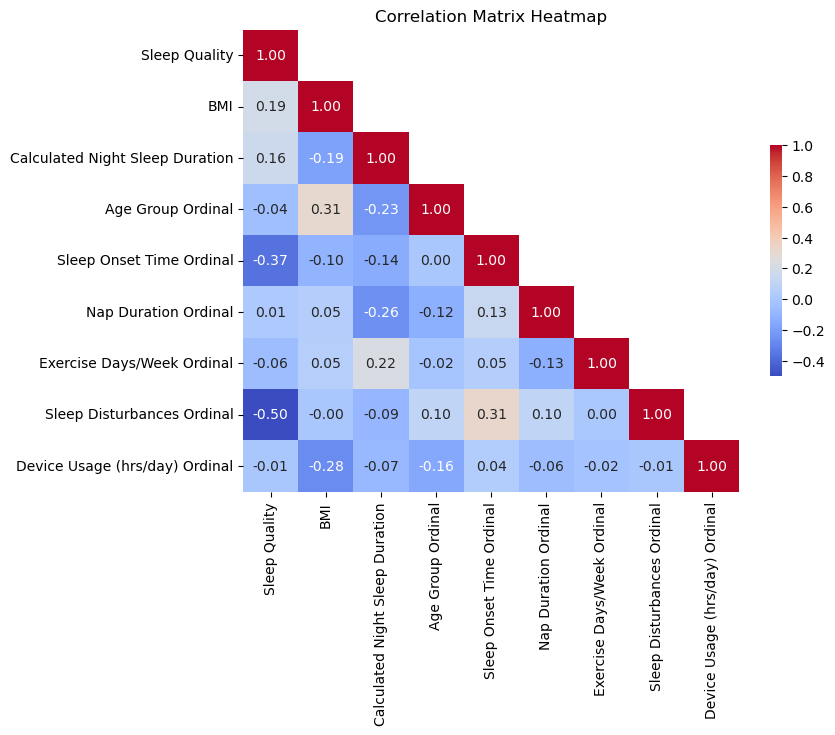

In [11]:
matrix = np.triu(corr_matrix, k=1)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'shrink': .5}, mask=matrix)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


- **Sleep Quality:** Strong negative correlation with Sleep Disturbances (-0.55), indicating better sleep quality is associated with fewer disturbances.
Moderate negative correlation with Sleep Onset Time (-0.32), suggesting that quicker sleep onset is associated with better sleep quality.

- **BMI:** Slight negative correlation with Calculated Night Sleep Duration (-0.19), suggesting that higher BMI might be slightly associated with shorter sleep duration, although the relationship is weak.
Moderate negative correlation with Device Usage (-0.28), indicating that higher BMI is associated with less device usage.

- **Calculated Night Sleep Duration:** Negative correlation with Age Group (-0.23), indicating that older age groups might have shorter sleep duration.
All other correlations with Calculated Night Sleep Duration are weak.

- **Age Group:** Moderate positive correlation with BMI (0.31), suggesting that higher BMI values are more prevalent in older age groups.

- **Sleep Onset Time:** No significant correlations with other variables, aside from the moderate negative correlation with Sleep Quality.

- **Nap Duration:** Weak correlations with all other variables.

- **Exercise Days/Week:** Slight positive correlation with Calculated Night Sleep Duration (0.22), implying that more exercise might be related to slightly longer sleep duration.
Weak correlations with all other variables.

- **Sleep Disturbances:** Aside from the strong negative correlation with Sleep Quality, Sleep Disturbances show weak correlations with other variables.

- **Device Usage (hrs/day):** Moderate negative correlation with BMI (-0.28), as previously mentioned.
Weak correlations with all other variables.
This heatmap indicates that while some variables are correlated, most relationships are weak. The strongest observed relationships involve sleep quality, particularly its negative correlation with sleep disturbances and sleep onset time. This suggests that variables affecting the quality of sleep have a more significant impact on sleep disturbances and the time it takes to fall asleep. The correlations involving BMI, age group, and device usage suggest demographic and behavioral patterns but are not strong enough to imply causation.

### Relationship with Sleep: Exercise and Device Usage

#### Sleep Quality

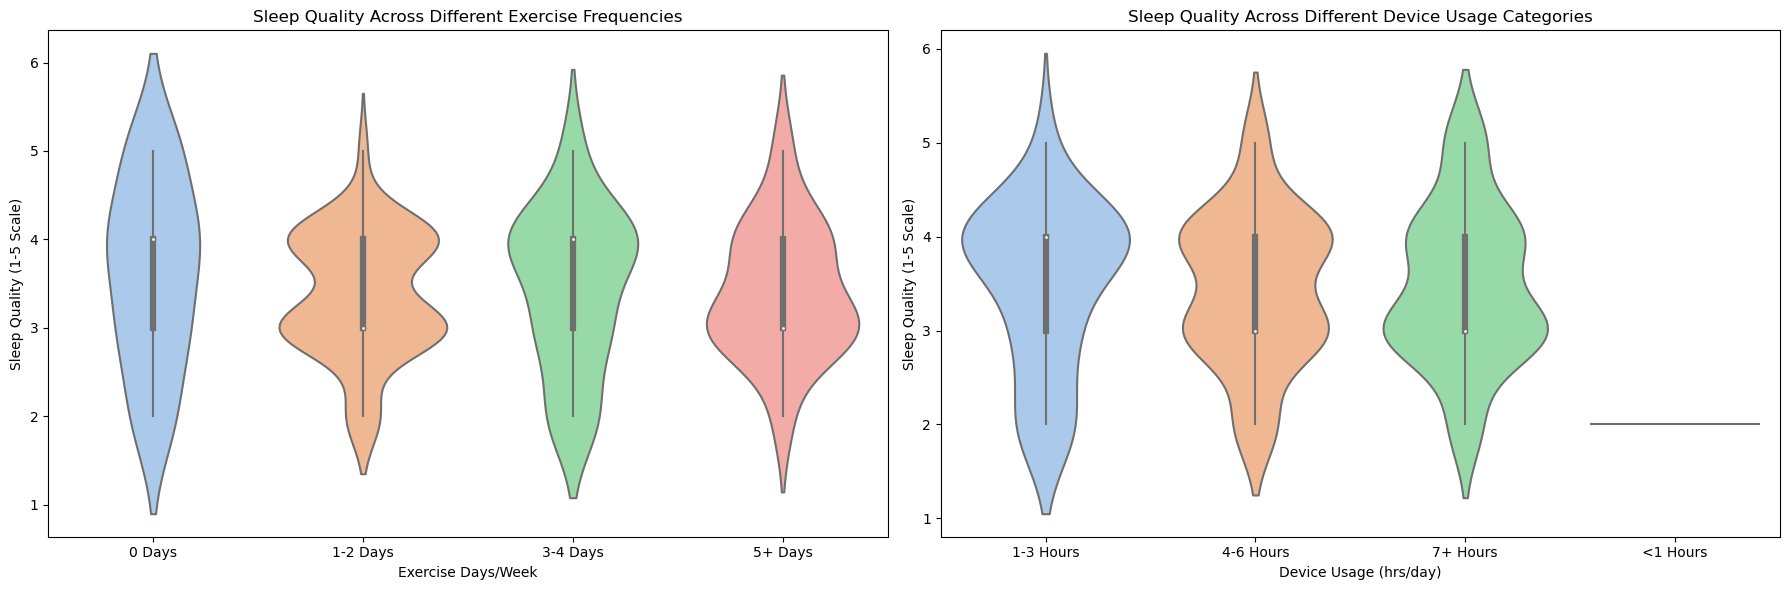

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Exercise Days/Week vs Sleep Quality
col = 'Exercise Days/Week'
sns.violinplot(ax=axes[0], x=col, y='Sleep Quality', data=df, palette='pastel', order=sorted(df[col].unique()))
axes[0].set_title('Sleep Quality Across Different Exercise Frequencies')
axes[0].set_xlabel(col)
axes[0].set_ylabel('Sleep Quality (1-5 Scale)')

# Device Usage (hrs/day) vs Sleep Quality
col = 'Device Usage (hrs/day)'
sns.violinplot(ax=axes[1], x=col, y='Sleep Quality', data=df, palette='pastel', order=sorted(df[col].unique()))
axes[1].set_title('Sleep Quality Across Different Device Usage Categories')
axes[1].set_xlabel(col)
axes[1].set_ylabel('Sleep Quality (1-5 Scale)')

plt.tight_layout()
plt.show()

**Sleep Quality Across Different Exercise Frequencies:**

The plot shows the distribution of sleep quality scores for each exercise frequency category. While there is some variation in the spread and density of scores across categories, there is no clear pattern indicating a strong relationship between exercise frequency and sleep quality.

**Sleep Quality Across Different Device Usage Categories:**

Similar to exercise frequency, the distribution of sleep quality scores varies across device usage categories. However, there is no evident trend showing a significant impact of device usage on sleep quality.

#### Sleep Duration

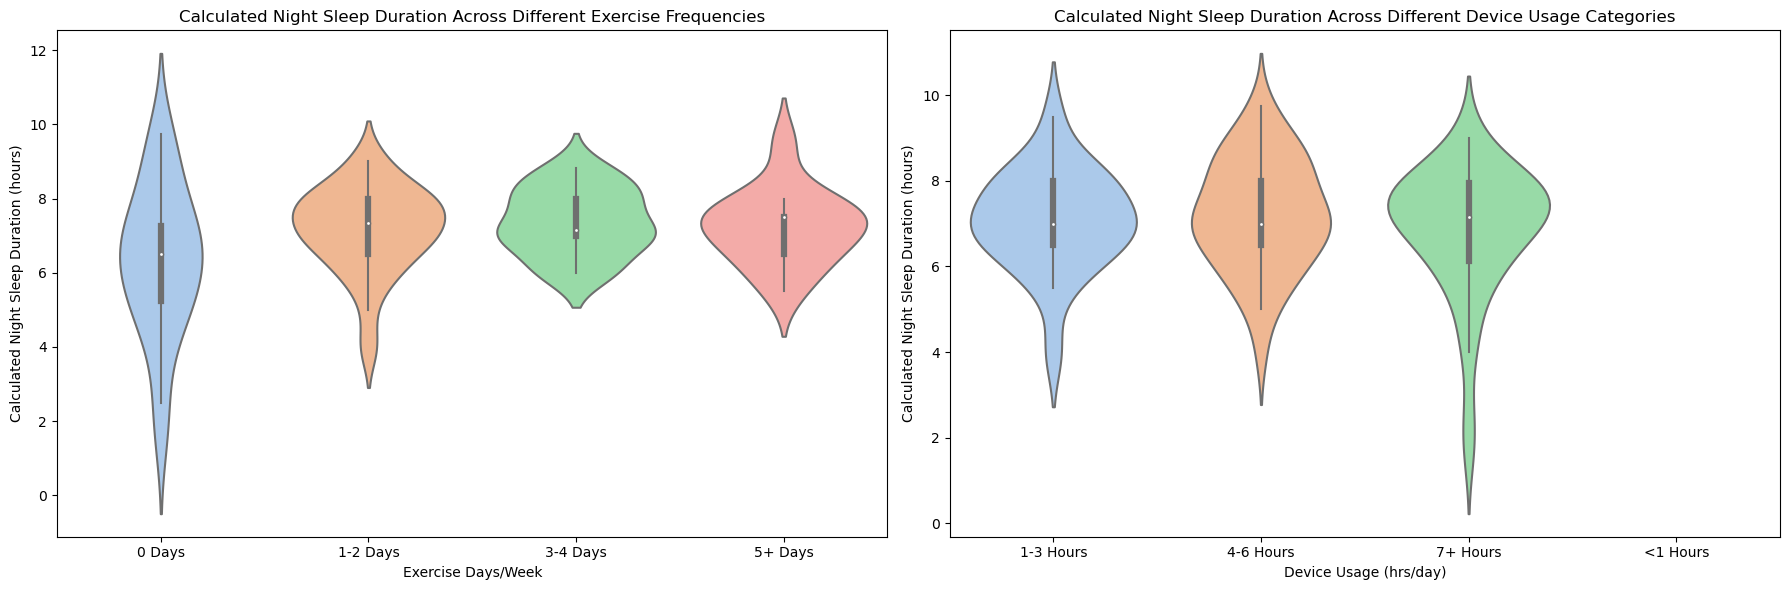

In [13]:
# Creating side-by-side violin plots for Exercise Days/Week and Device Usage (hrs/day) vs Calculated Night Sleep Duration

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Exercise Days/Week vs Calculated Night Sleep Duration
col = 'Exercise Days/Week'
sns.violinplot(ax=axes[0], x=col, y='Calculated Night Sleep Duration', data=df, palette='pastel', order=sorted(df[col].unique()))
axes[0].set_title('Calculated Night Sleep Duration Across Different Exercise Frequencies')
axes[0].set_xlabel(col)
axes[0].set_ylabel('Calculated Night Sleep Duration (hours)')

# Device Usage (hrs/day) vs Calculated Night Sleep Duration
col = 'Device Usage (hrs/day)'
sns.violinplot(ax=axes[1], x=col, y='Calculated Night Sleep Duration', data=df, palette='pastel', order=sorted(df[col].unique()))
axes[1].set_title('Calculated Night Sleep Duration Across Different Device Usage Categories')
axes[1].set_xlabel(col)
axes[1].set_ylabel('Calculated Night Sleep Duration (hours)')

plt.tight_layout()
plt.show()



**General Trends:** The distribution of sleep duration across different exercise frequencies and device usage categories shows some variation, but not a distinct or consistent pattern that strongly suggests a direct relationship. For exercise, categories with higher frequencies ('3-4 Days', '5-6 Days') show a slightly more concentrated distribution around higher sleep durations, indicating a potential positive impact of regular exercise on sleep duration. However, this pattern is not uniformly observed across all exercise levels.


**Impact on Lower Sleep Duration Bounds:**


**Exercise:** In categories with lower exercise frequency ('0 Days', '1-2 Days'), the distribution has a tail extending towards shorter sleep durations. This suggests that within these groups, some individuals experience shorter sleep durations, potentially implicating lower physical activity as a factor in reduced sleep duration. This could be due to less physical tiredness, differing stress levels, or other lifestyle factors.

**Device Usage:** Similarly, for higher device usage categories ('5-7 Hours', '7+ Hours'), there's a noticeable extension towards shorter sleep durations. This indicates that among individuals with high screen time, a subset experiences shorter sleep. This could be attributed to factors like blue light exposure impacting circadian rhythms, increased mental stimulation, or the displacement of sleep time.
These observations highlight the complex and multifaceted nature of factors influencing sleep duration. While higher physical activity and lower device usage might be associated with longer sleep durations for some individuals, the variability within each category underlines the influence of multiple interacting factors. These insights provide a basis for further investigation into how lifestyle modifications, such as increasing physical activity or managing screen time, could potentially improve sleep duration, particularly for those currently experiencing shorter sleep.

#### Sleep Disturbances


The bar chart depicts the count of different sleep disturbance responses (Rarely, Sometimes, Never, Frequently, Often) across various exercise frequency categories (0 Days, 1-2 Days, 3-4 Days, 5+ Days).
There is a noticeable trend where individuals who do not exercise (0 Days) have a higher count of sleep disturbances across almost all types of disturbance frequencies, especially for the responses 'Sometimes' and 'Rarely'.
As the exercise frequency increases, the count of reported sleep disturbances seems to decrease, particularly for 'Sometimes' and 'Rarely' disturbances. For example, those exercising '5+ Days' show a lower count of disturbances.
Interestingly, the 'Never' response appears to be relatively consistent across all exercise frequencies, suggesting a subset of individuals who do not experience disturbances regardless of exercise habits.

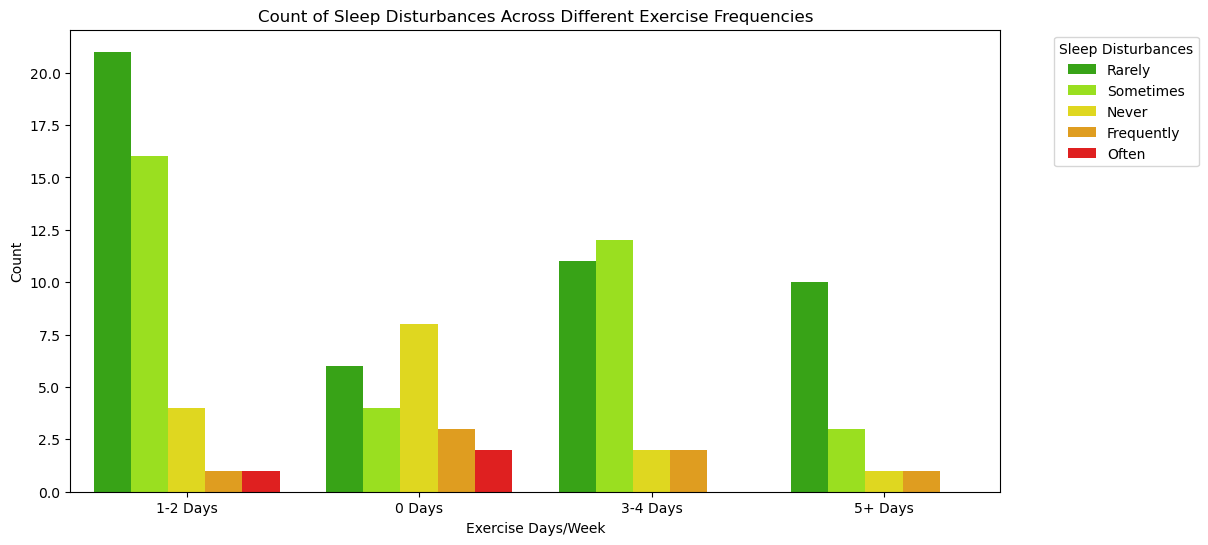

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x="Exercise Days/Week",
    hue="Sleep Disturbances",
    data=df,
    palette=[
        "#2cba00",
        "#a3ff00",
        "#fff400",
        "#ffa700",
        "#ff0000",
    ],
)
plt.title("Count of Sleep Disturbances Across Different Exercise Frequencies")
plt.xlabel("Exercise Days/Week")
plt.ylabel("Count")
plt.legend(title="Sleep Disturbances", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

- The bar chart depicts the count of different sleep disturbance responses (Rarely, Sometimes, Never, Frequently, Often) across various exercise frequency categories (0 Days, 1-2 Days, 3-4 Days, 5+ Days).
- There is a noticeable trend where individuals who do not exercise (0 Days) have a higher count of sleep disturbances across almost all types of disturbance frequencies, especially for the responses 'Sometimes' and 'Rarely'.
- As the exercise frequency increases, the count of reported sleep disturbances seems to decrease, particularly for 'Sometimes' and 'Rarely' disturbances. For example, those exercising '5+ Days' show a lower count of disturbances.
- Interestingly, the 'Never' response appears to be relatively consistent across all exercise frequencies, suggesting a subset of individuals who do not experience disturbances regardless of exercise habits.

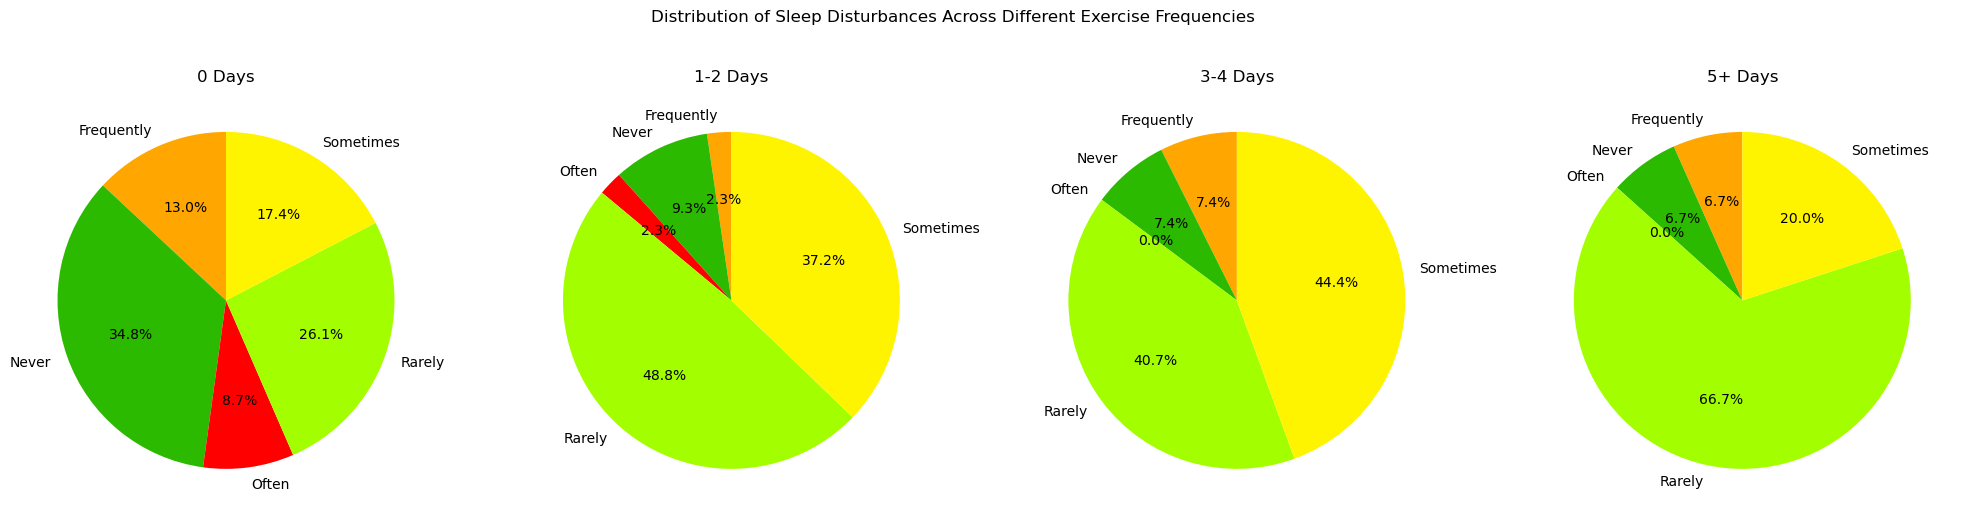

In [15]:
# Preparing the data for pie charts
exercise_disturbance_counts = df.groupby(['Exercise Days/Week', 'Sleep Disturbances']).size().unstack().fillna(0)

# Number of exercise categories
num_categories = exercise_disturbance_counts.shape[0]

# Creating pie charts for each exercise group
fig, axes = plt.subplots(1, num_categories, figsize=(25, 6))
legends = ['Rarely', 'Sometimes', 'Never', 'Frequently', 'Often']
for i, (exercise_category, counts) in enumerate(exercise_disturbance_counts.iterrows()):
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#ffa700', '#2cba00', '#ff0000', '#a3ff00', '#fff400'], )
    axes[i].set_title(exercise_category)

plt.suptitle('Distribution of Sleep Disturbances Across Different Exercise Frequencies')
plt.show()


- The pie charts show the distribution of sleep disturbances within each exercise category. This gives a percentage breakdown of how often individuals within each exercise group experience sleep disturbances.
- In the '0 Days' exercise category, a significant proportion reports 'Sometimes' experiencing disturbances, followed by 'Rarely' and 'Frequently'. Interestingly, the majority of this group (34.8%) reported to 'Never' have sleep disturbances.
- As exercise frequency increases, there is a visible shift toward 'Rarely' being the most common response, suggesting better sleep quality with more frequent exercise.
- In the highest exercise frequency group ('5+ Days'), the majority report 'Rarely' experiencing sleep disturbances, which supports the notion that regular exercise may contribute to fewer sleep disturbances.

### Relationship with Sleep: BMI

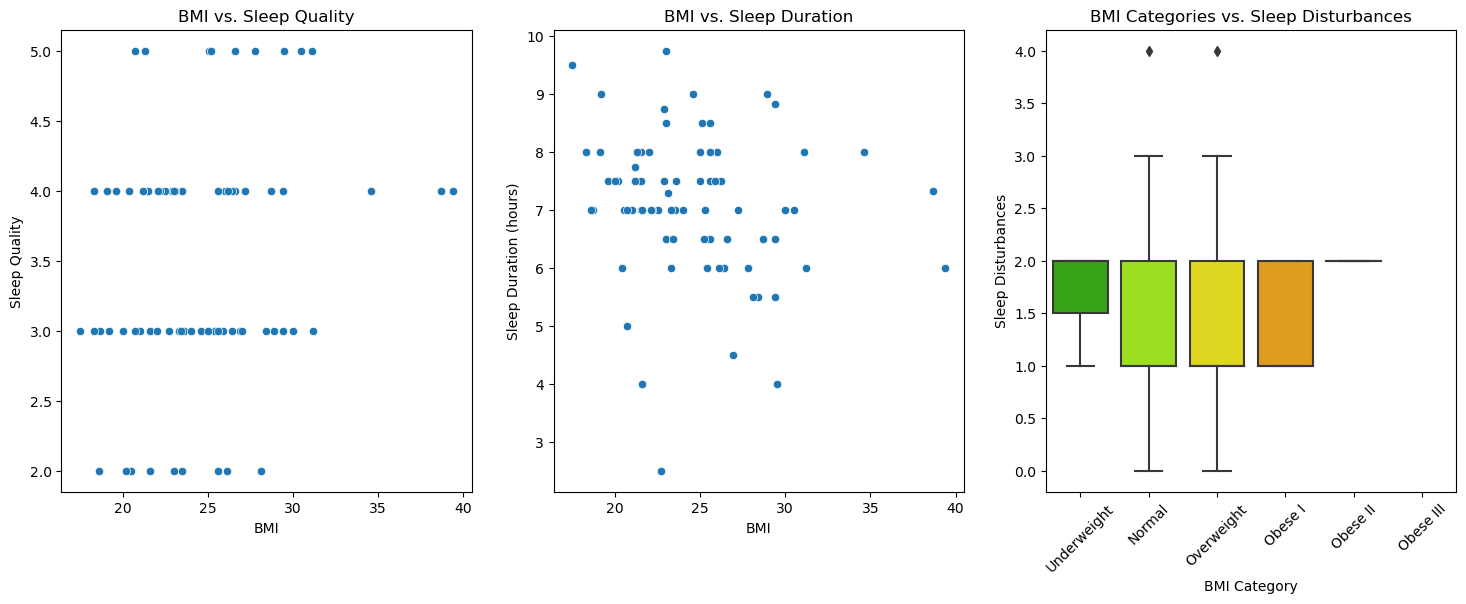

In [16]:
import numpy as np

# Start plotting
plt.figure(figsize=(18, 6))

# Scatter plot for BMI vs. Sleep Quality
plt.subplot(1, 3, 1)
sns.scatterplot(x='BMI', y='Sleep Quality', data=df)
plt.title('BMI vs. Sleep Quality')
plt.xlabel('BMI')
plt.ylabel('Sleep Quality')

# Scatter plot for BMI vs. Calculated Night Sleep Duration
plt.subplot(1, 3, 2)
sns.scatterplot(x='BMI', y='Calculated Night Sleep Duration', data=df)
plt.title('BMI vs. Sleep Duration')
plt.xlabel('BMI')
plt.ylabel('Sleep Duration (hours)')

# Define bins for BMI categories
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
df['BMI Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

# Creating the box plot with the new BMI categories
# plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 3)
sns.boxplot(x='BMI Category', y='Sleep Disturbances Ordinal', data=df, palette=[
        "#2cba00",
        "#a3ff00",
        "#fff400",
        "#ffa700",
        "#ff0000",
    ])
plt.title('BMI Categories vs. Sleep Disturbances')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Disturbances')
plt.xticks(rotation=45) # Rotate the labels to avoid overlapping
plt.show()

- **BMI vs. Sleep Quality (Scatter Plot on the Left):** The scatter plot shows individual points representing the relationship between BMI and sleep quality for each respondent.
There does not appear to be a clear trend or pattern indicating a strong relationship between BMI and sleep quality. The points are quite dispersed, suggesting that other factors might also play a significant role in determining sleep quality.
- **BMI vs. Sleep Duration (Scatter Plot in the Middle):** Similar to sleep quality, the scatter plot for BMI and calculated night sleep duration does not show a distinct correlation.
The spread of points indicates variability in sleep duration across the range of BMI values.
- **BMI vs. Sleep Disturbances (Box Plot on the Right):** The box plot visualization indicates that there is no clear or significant difference in the median sleep disturbances across BMI categories ranging from Underweight to Obese III. All categories have a similar median value, suggesting that BMI alone is not a strong predictor of sleep disturbances. The presence of outliers in each category suggests individual variability, and the interquartile ranges (box lengths) show that the spread of sleep disturbances is relatively consistent across categories, with some variation in the Underweight category. Overall, the plot suggests that while BMI may play a role, it is likely one of many factors that contribute to sleep disturbances.
- **Summary:**
The data visualizations suggest that BMI, within the range present in the dataset, does not have a straightforward relationship with sleep quality, duration, or disturbances. This indicates the complexity of sleep-related issues and the possibility that they are influenced by a multitude of factors, with BMI being just one of them. Detailed statistical analysis would be required to identify any subtle patterns or to confirm the lack of a relationship.

## Summary


In this document, we present a comprehensive analysis of the sleep survey data. The key points are:

1. **Descriptive Statistics Summary**:
   - **Sleep Quality**: The average rating is 3.44 out of 5, indicating moderate sleep quality with room for improvement.
   - **BMI**: The average BMI is approximately 24.55, with a range from 17.5 to 39.4, covering normal to obese categories.
   - **Sleep Duration**: The average night sleep duration is about 7 hours, with a range from 1.67 to 9.75 hours, showing significant variability.

2. **Visualization Summary**:
   - **Sleep Quality Distribution**: Scores are mainly distributed between 2 and 4, with 3 being the most common, suggesting moderate sleep quality overall.
   - **Sleep Duration Distribution**: There's a normal distribution centered around 7 hours, aligning with general recommendations.

3. **Correlation Matrix Summary**:
   - **Sleep Quality**: Shows a moderate negative correlation with sleep disturbances, which is expected as better sleep quality typically associates with fewer disturbances.
   - **BMI**: Displays low correlations with other variables, suggesting it is not a strong determinant of sleep patterns in this dataset.
   - **Sleep Duration and Exercise**: A small positive correlation suggests more exercise might be linked to slightly longer sleep duration, but the relationship is not strong.

4. **Relationship with Sleep, Exercise, and Device Usage**:
   - **Sleep Quality and Exercise**: No strong relationship is evident; sleep quality scores are distributed across exercise frequencies without a clear pattern.
   - **Sleep Quality and Device Usage**: Similar to exercise, no significant impact of device usage on sleep quality is observed.
   - **Sleep Duration Trends**: Some variation in sleep duration across exercise frequencies and device usage is noted, but no consistent pattern emerges.

5. **Sleep Disturbances**:
   - **Exercise Frequency**: A decreasing trend in sleep disturbances is observed with increased exercise frequency. Notably, individuals who do not exercise report higher disturbances, while those with higher exercise frequency report fewer disturbances.
   - **Sleep Disturbance Distribution**: Pie charts demonstrate that more frequent exercise correlates with 'Rarely' experiencing disturbances, suggesting a beneficial effect of exercise on sleep quality.

6. **BMI and Sleep**:
   - The scatter plots do not reveal a clear trend between BMI and sleep quality or duration, indicating that BMI is not a strong predictor of these aspects of sleep.
   - The box plot shows no significant differences in sleep disturbances across BMI categories.

**Overall**, the analysis suggests that while factors like BMI, exercise, and device usage have some association with sleep patterns, they do not exhibit strong, direct relationships within this dataset. Sleep quality, duration, and disturbances appear to be influenced by a complex interplay of factors, with individual variability playing a significant role.
